In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [2]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

In [3]:
print(X_treinamento.shape)
print(y_treinamento.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(X_teste.shape)
print(y_teste.shape)

(10000, 28, 28)
(10000,)


Text(0.5, 1.0, 'Classe 5')

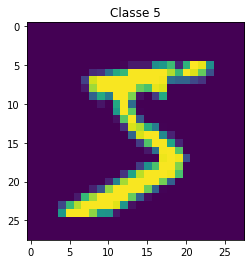

In [5]:
index=0
plt.imshow(X_treinamento[index])
plt.title('Classe ' + str(y_treinamento[index]))

Text(0.5, 1.0, 'Classe 5')

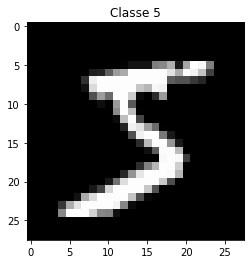

In [6]:
index=0
plt.imshow(X_treinamento[index], cmap = 'gray')
plt.title('Classe ' + str(y_treinamento[index]))

In [7]:
X_treinamento[0][20][16]

253

In [8]:
X_treinamento[0][20]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
       253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [9]:
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0],
                                               28, 28, 1)
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

In [10]:
X_treinamento[0][20][16]

253

In [11]:
previsores_treinamento[0][20]

array([[  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [ 24],
       [114],
       [221],
       [253],
       [253],
       [253],
       [253],
       [201],
       [ 78],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0]], dtype=uint8)

In [12]:
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')

In [13]:
previsores_treinamento /= 255
previsores_teste /= 255

In [14]:
previsores_treinamento[0][20]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.09411765],
       [0.44705883],
       [0.8666667 ],
       [0.99215686],
       [0.99215686],
       [0.99215686],
       [0.99215686],
       [0.7882353 ],
       [0.30588236],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

Text(0.5, 1.0, 'Classe 5')

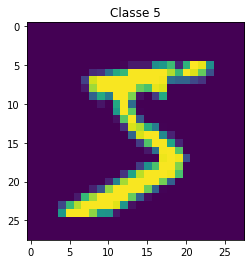

In [15]:
index=0
plt.imshow(previsores_treinamento[index])
plt.title('Classe ' + str(y_treinamento[index]))

In [16]:
classe_treinamento = np_utils.to_categorical(y_treinamento, 10)
classe_teste = np_utils.to_categorical(y_teste, 10)

In [17]:
classe_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [18]:
classificador = Sequential()

classificador.add(Conv2D(32, # 32 detectors (64 é o recomendado inicial)
                         (3,3), # tamanho do kernel
                         input_shape=(28, 28, 1),
                         activation = 'relu'))

classificador.add(BatchNormalization())

classificador.add(MaxPooling2D(pool_size = (2,2)))

#classificador.add(Flatten())

classificador.add(Conv2D(32, (3,3), activation = 'relu'))

classificador.add(BatchNormalization())

classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))

classificador.add(Dense(units = 10, 
                        activation = 'softmax'))

classificador.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam', metrics = ['accuracy'])

In [19]:
classificador.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

In [20]:
classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 128, epochs = 2,
                  validation_data = (previsores_teste, classe_teste))

Epoch 1/2
469/469 [==============================] - 50s 106ms/step - loss: 0.2213 - accuracy: 0.9317 - val_loss: 0.2031 - val_accuracy: 0.9428
Epoch 2/2
469/469 [==============================] - 51s 109ms/step - loss: 0.0644 - accuracy: 0.9814 - val_loss: 0.0382 - val_accuracy: 0.9881


In [21]:
resultado = classificador.evaluate(previsores_teste, classe_teste)

313/313 [==============================] - 2s 5ms/step - loss: 0.0382 - accuracy: 0.9881


In [22]:
X_teste.shape

(10000, 28, 28)

In [49]:
import random
n = random.randint(0,10000)
print(n)

3934


Text(0.5, 1.0, 'Classe 8')

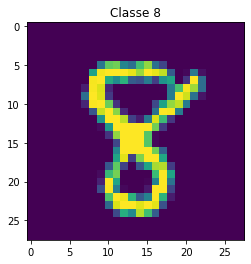

In [50]:
index=n
plt.imshow(X_teste[index])
plt.title('Classe ' + str(y_teste[index]))

In [51]:
X_teste[n].shape

(28, 28)

In [52]:
import numpy as np

In [53]:
input_test = X_teste[n].astype('float32')
input_test /= 255
input_test = input_test.reshape(28, 28, 1)
input_test = np.expand_dims(input_test, axis = 0)

In [54]:
previsao = classificador.predict(input_test)
print(previsao)

[[6.8547119e-11 7.5631532e-12 5.4105474e-08 6.0032228e-09 3.0580656e-11
  6.8468919e-09 2.7534958e-10 3.0703304e-09 9.9999988e-01 7.3200619e-09]]


In [55]:
previsao = (previsao > 0.5)
print(previsao)

[[False False False False False False False False  True False]]


In [56]:
resultado = np.argmax(previsao)
resultado

8